In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

In [2]:
def get_DF(index_name):
    df_raw = pd.read_csv(f'data/{index_name}.csv')
    DF = pd.DataFrame()
    for column in df_raw.columns:
        if column.lower().find('date') != -1:
            DF['date'] = pd.to_datetime(df_raw[column])
        if column.lower().find('close') != -1:
            DF['close'] = df_raw[column]
    
    plt.figure(figsize=(30, 5))
    plt.title(index_name)
    plt.plot(DF.date, DF.close)
    plt.show()
    
    return DF

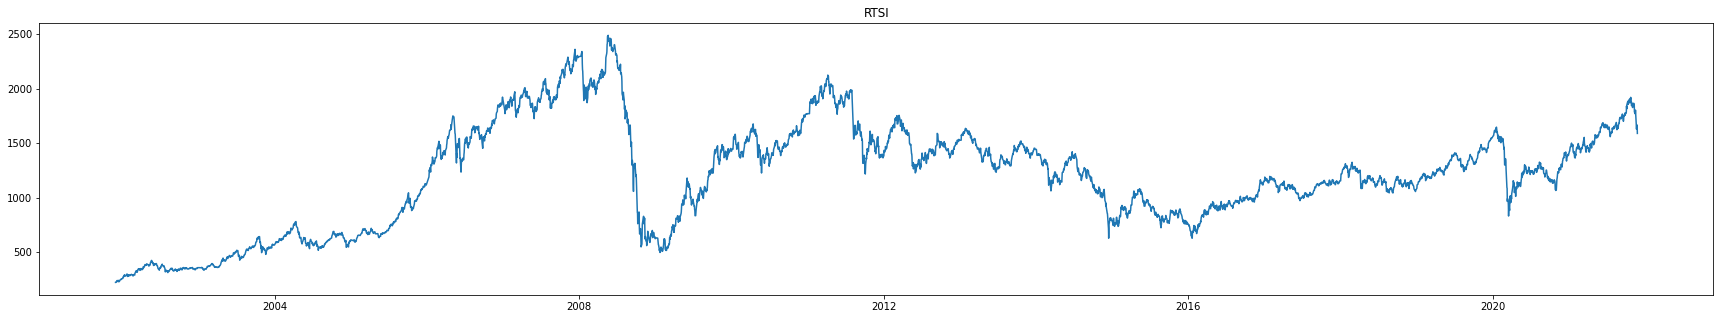

,date,close
0,2021-11-26,1589.38
1,2021-11-25,1665.74
2,2021-11-24,1660.59
3,2021-11-23,1662.38
4,2021-11-22,1628.10
...,...,...
5117,2001-12-04,234.99
5118,2001-12-03,227.01
5119,2001-11-30,226.49
5120,2001-11-29,223.58


In [143]:
res = get_DF('RTSI')
res

In [3]:
indexes_list = [
    'RTSI',
    'IMOEX',
    'MOEXBC',
    'Merval',
    'ASX',
    'Bovespa',
    'DAX',
    'BSE',
    'LQ45',
    'FTSEMIB',
    'GSPTSE',
    'SSEC',
    'FTSE100',
    'IPC',
    'SP500',
    'XU100',
    'CAC',
    'Kospi',
    'FTSEJSE',
    'Nikkei225',
    'TASI',
]

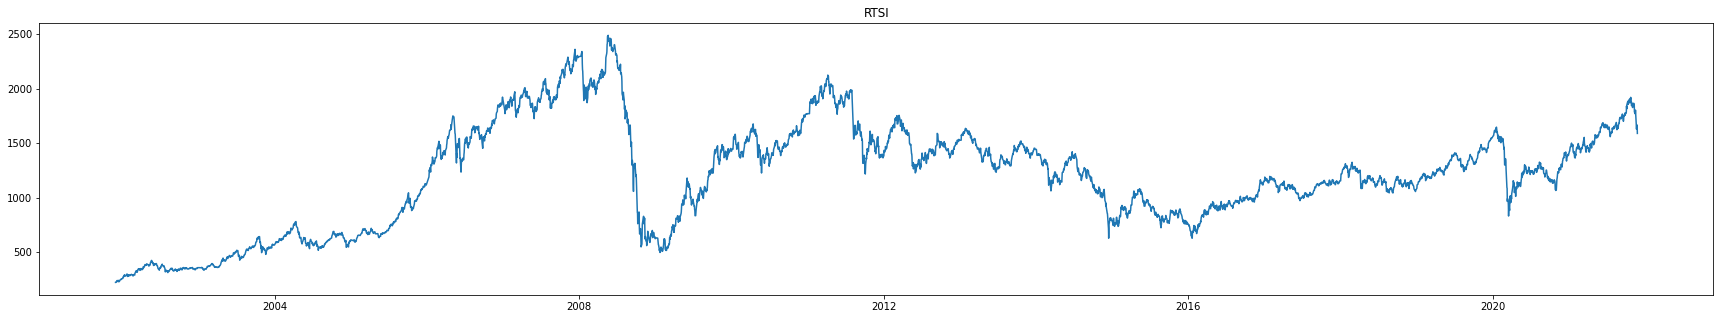

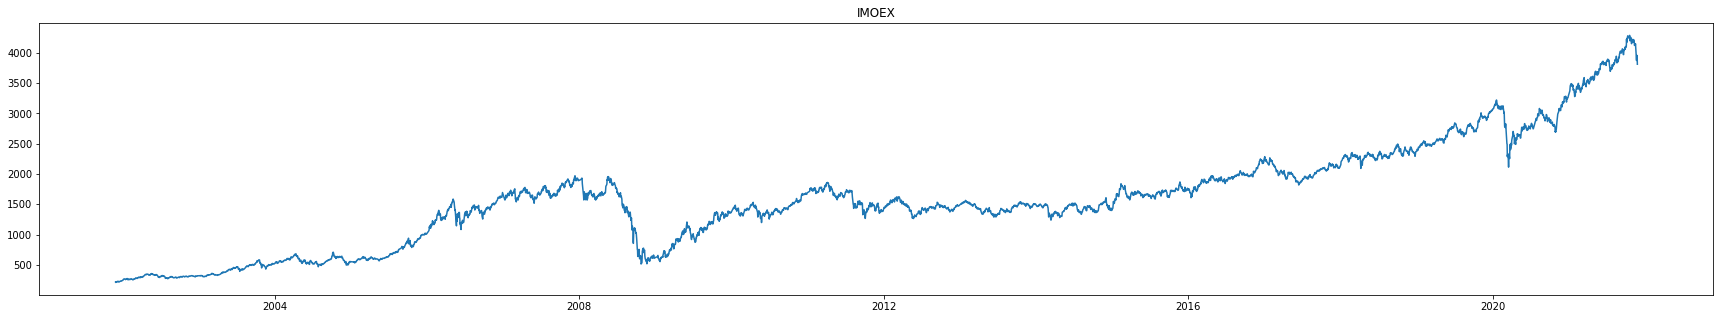

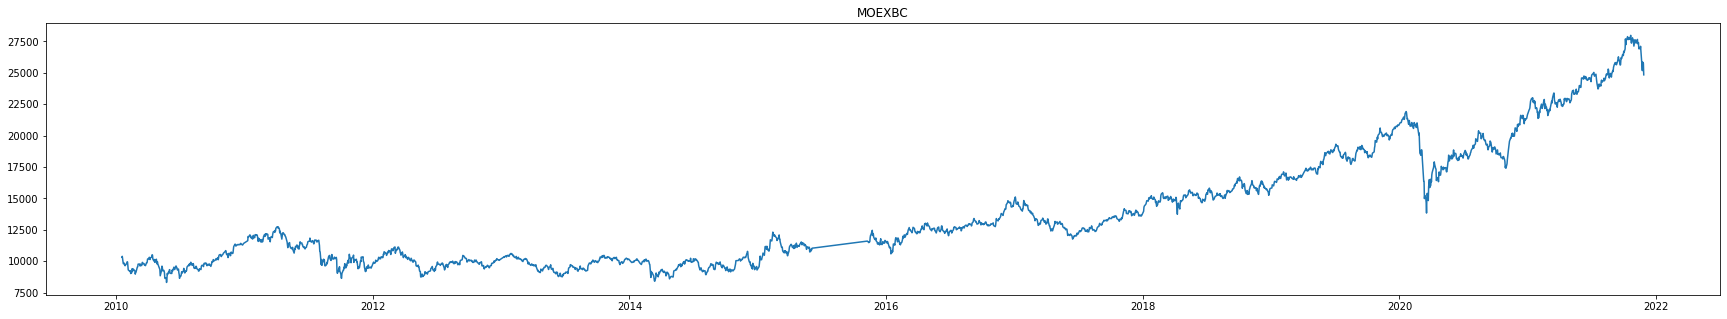

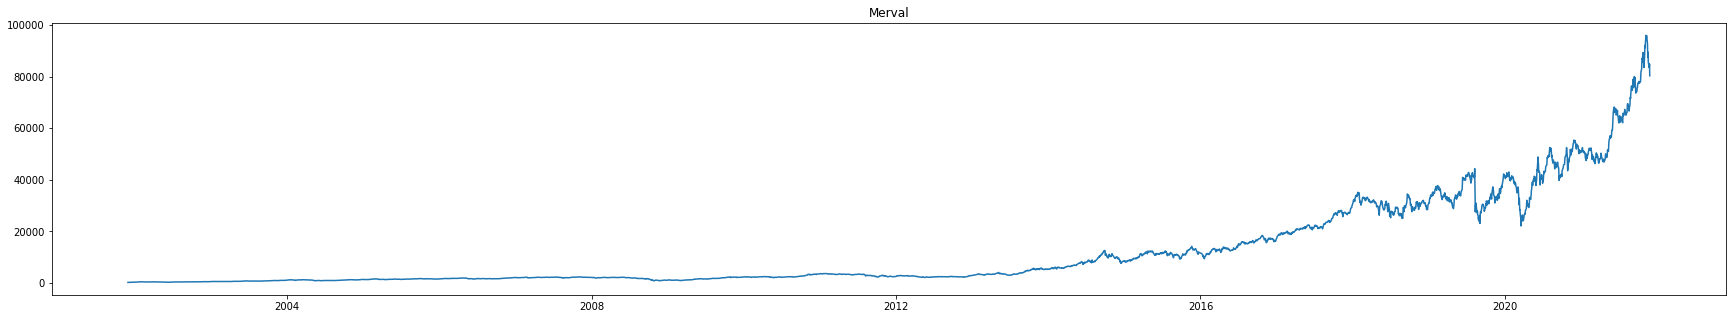

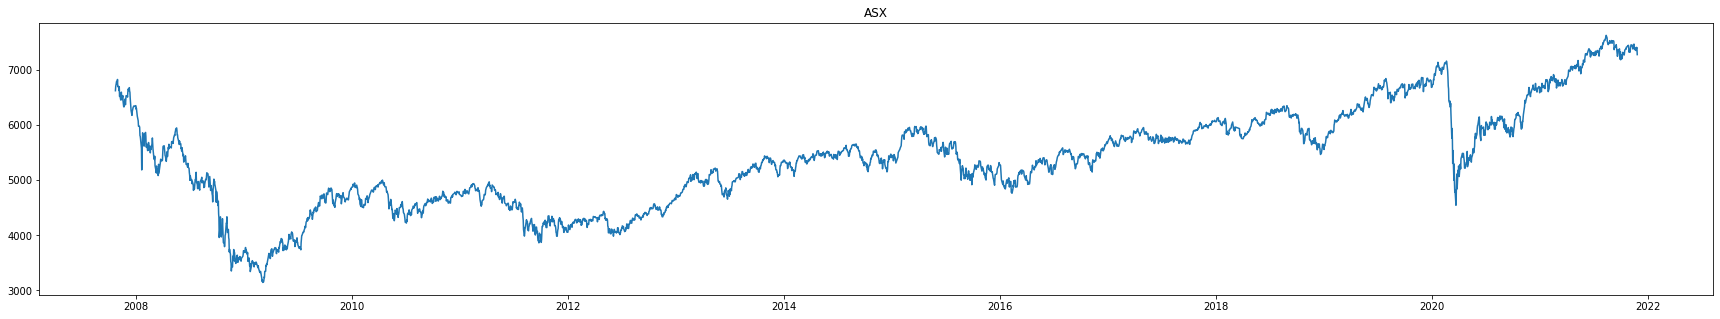

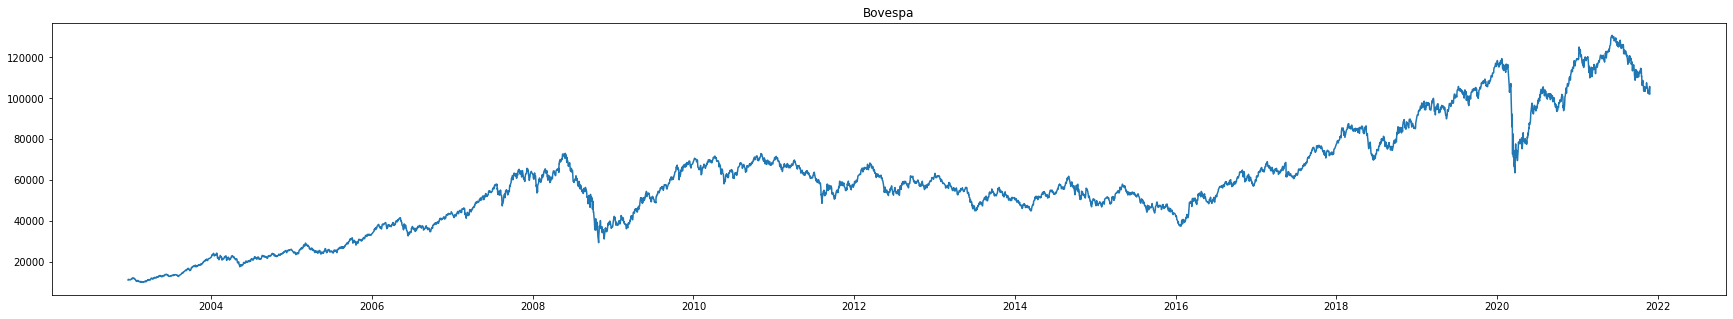

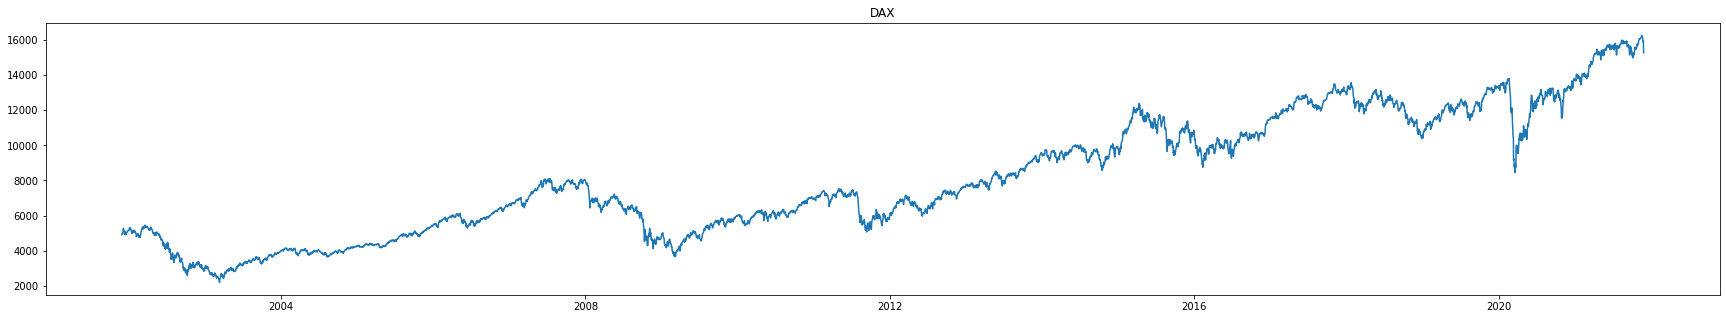

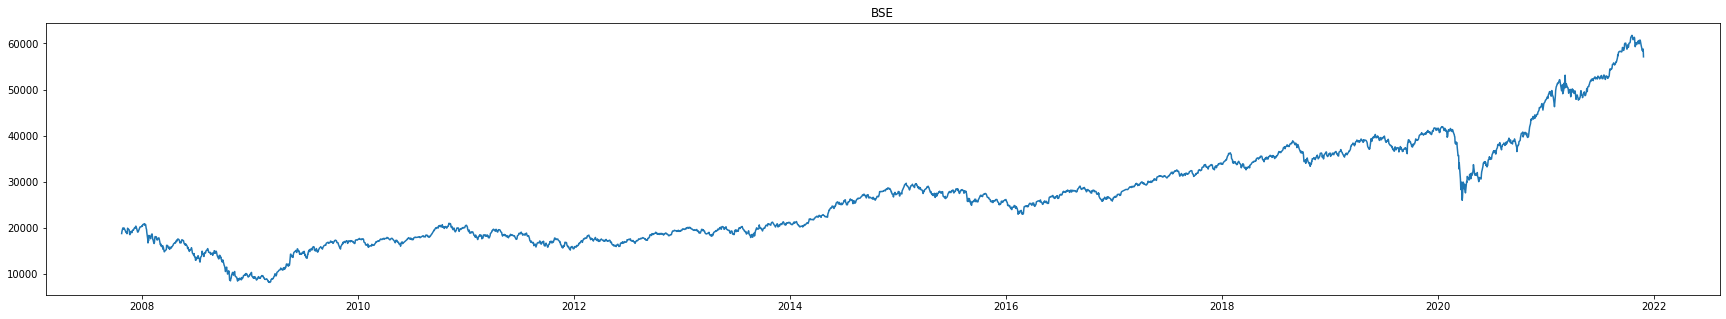

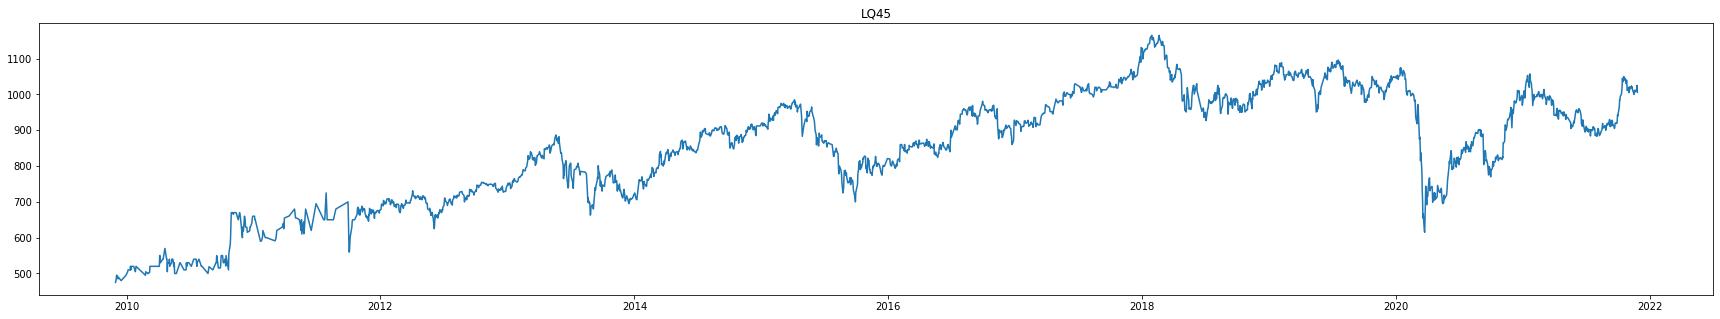

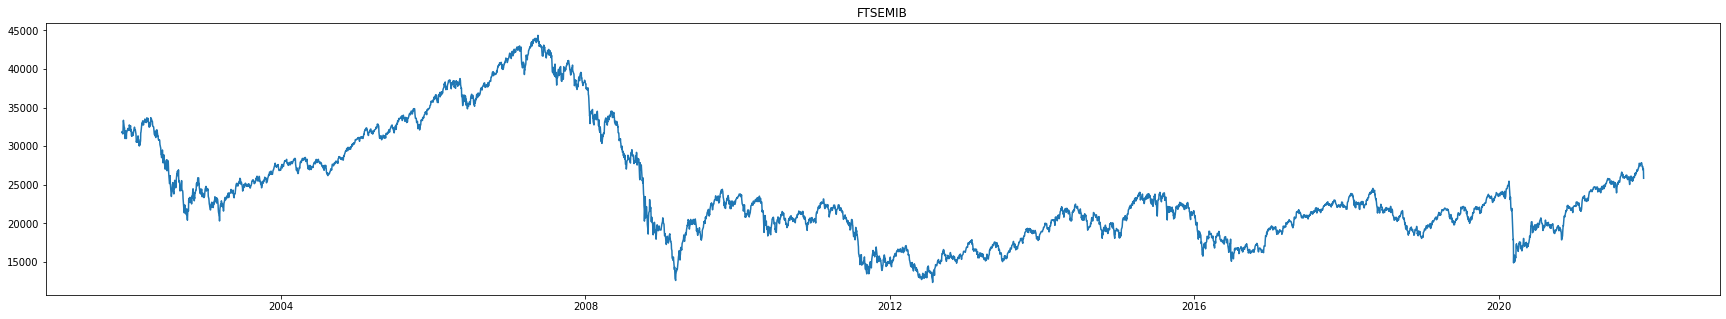

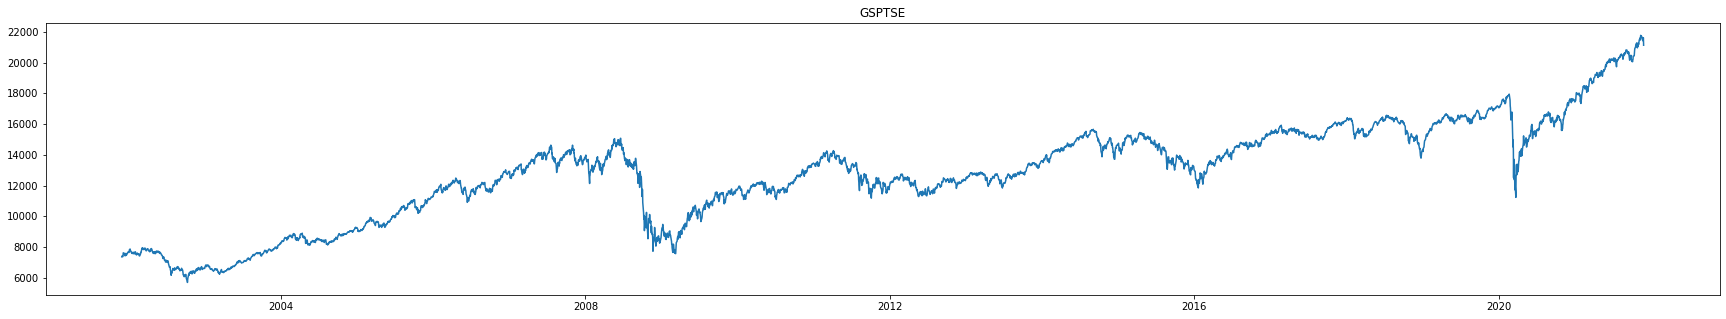

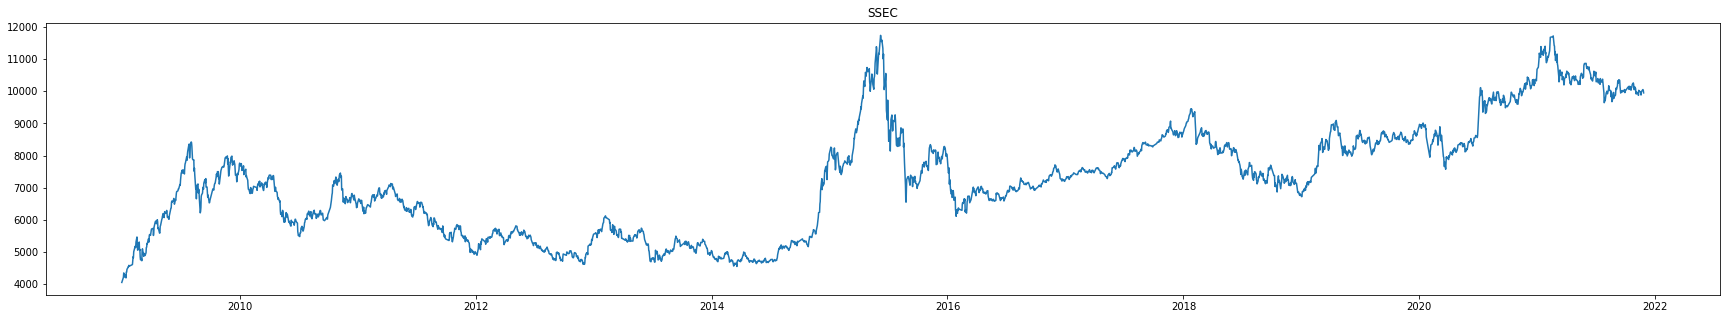

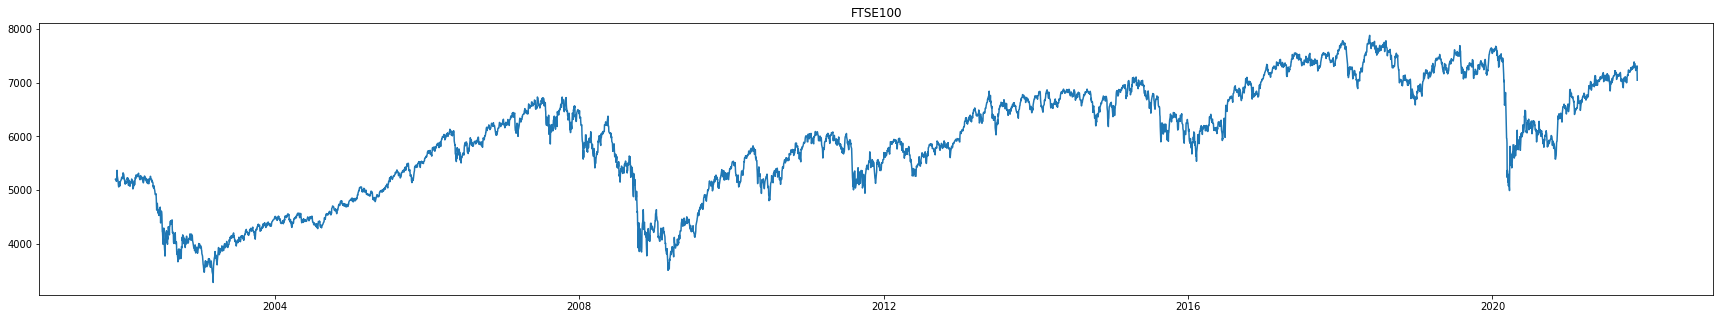

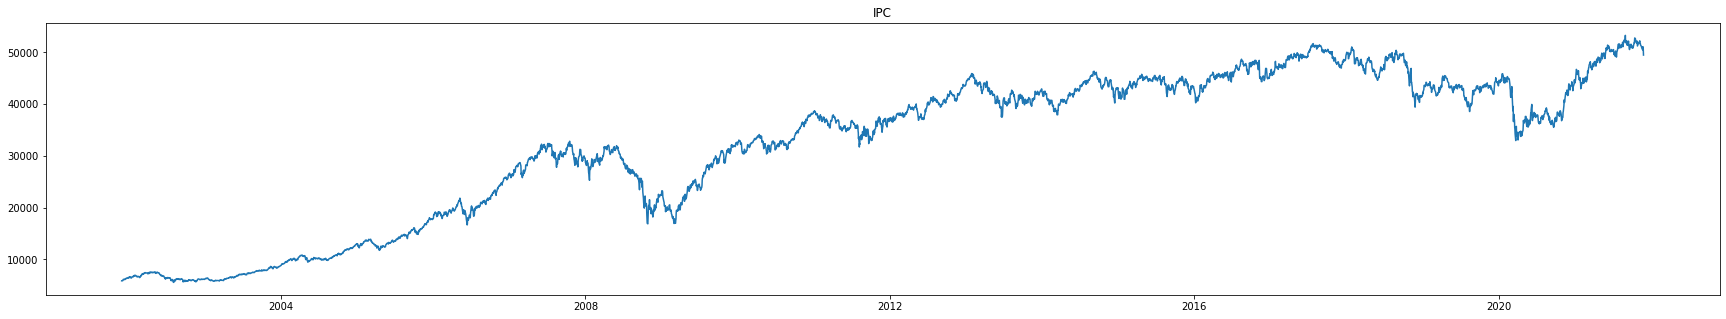

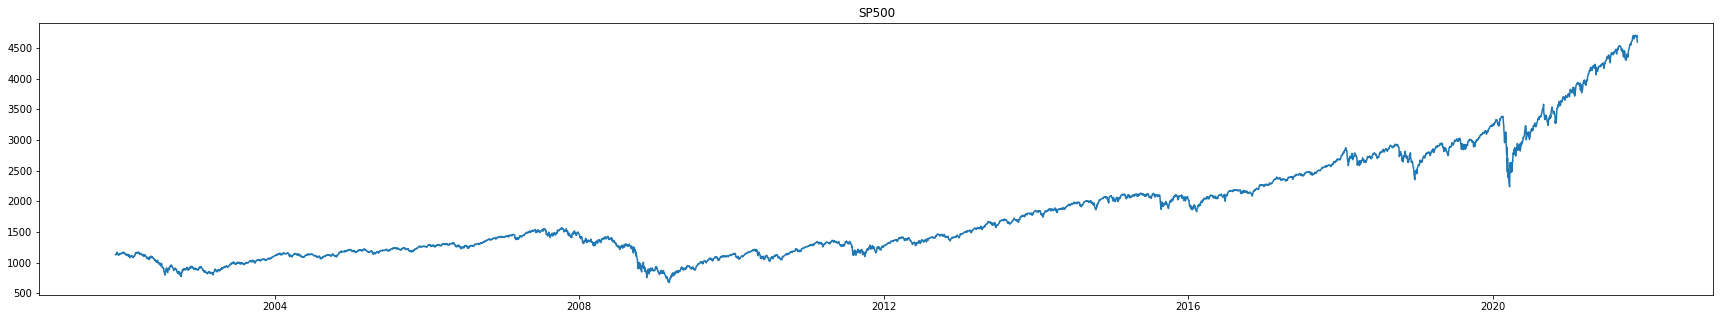

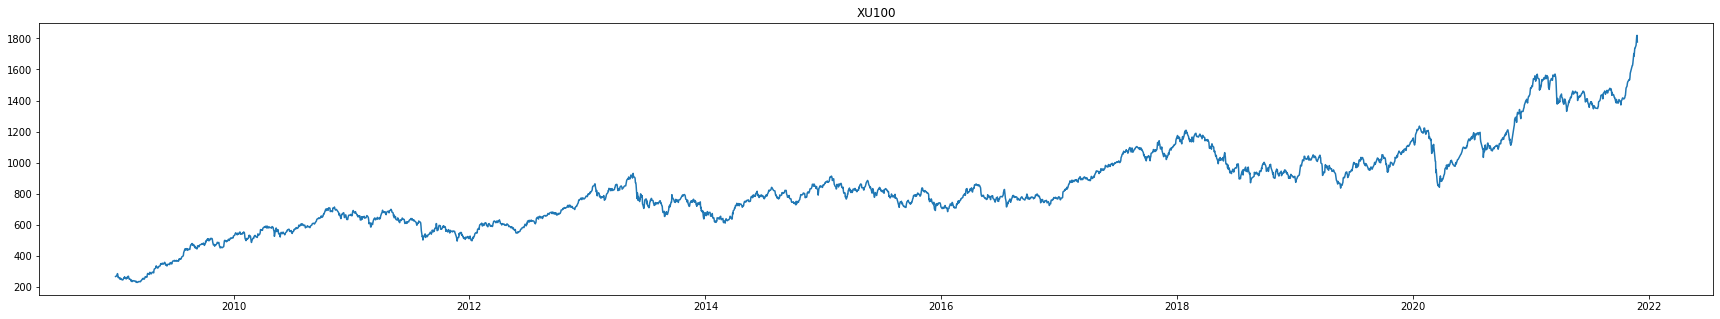

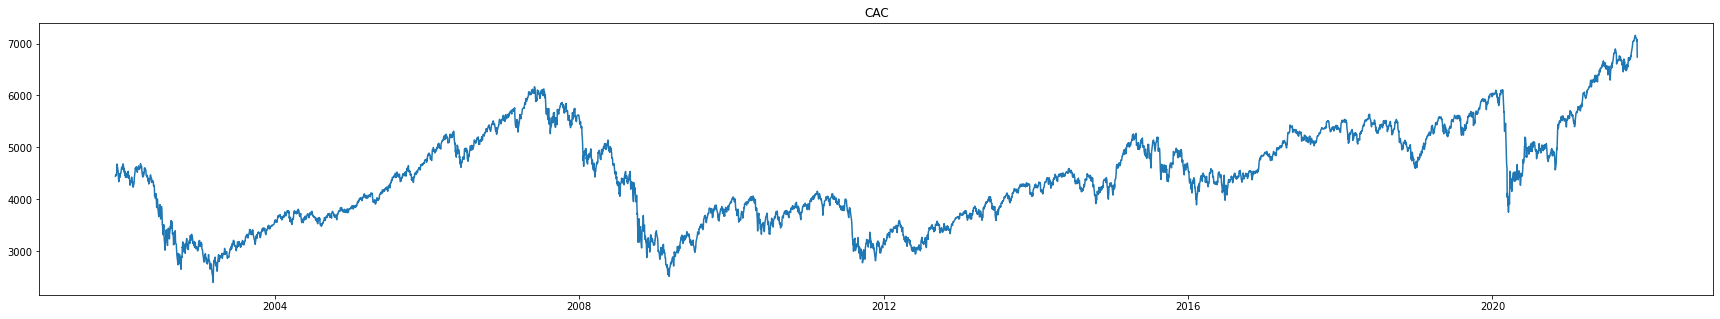

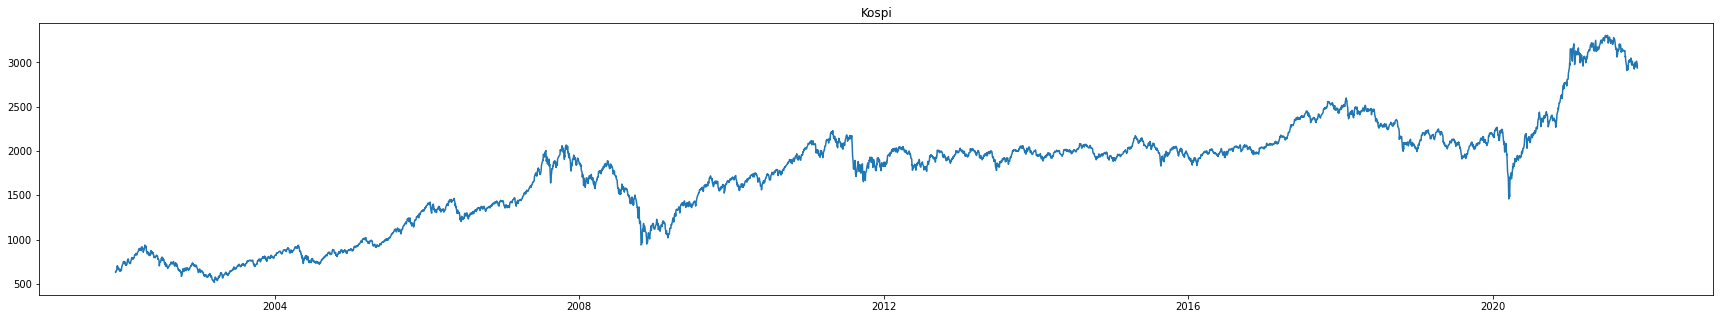

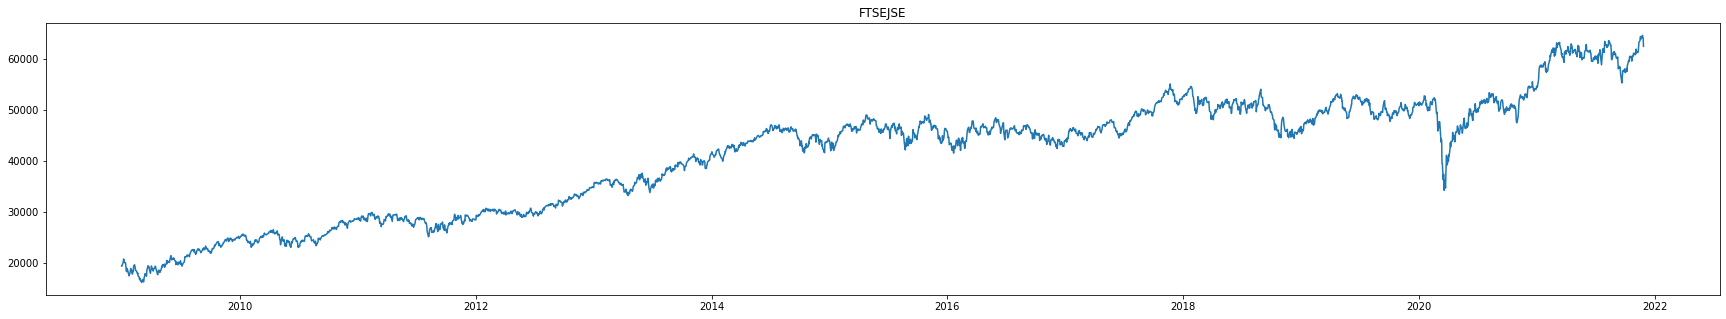

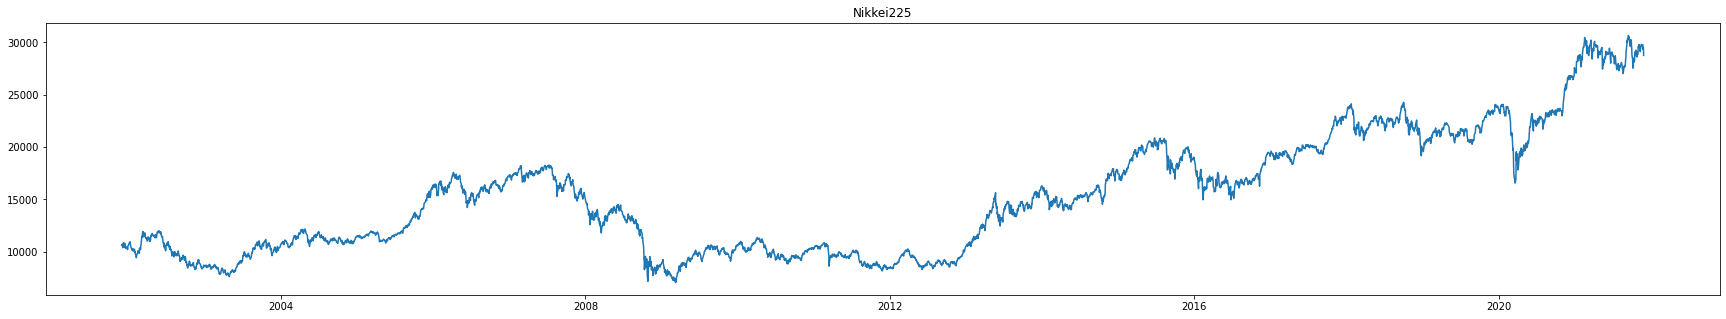

TASI	index not found


In [7]:
indexes = {}
for index_name in indexes_list:
    try:
        indexes[index_name]= get_DF(index_name)
    except FileNotFoundError:
        print(f'{index_name}\tindex not found')

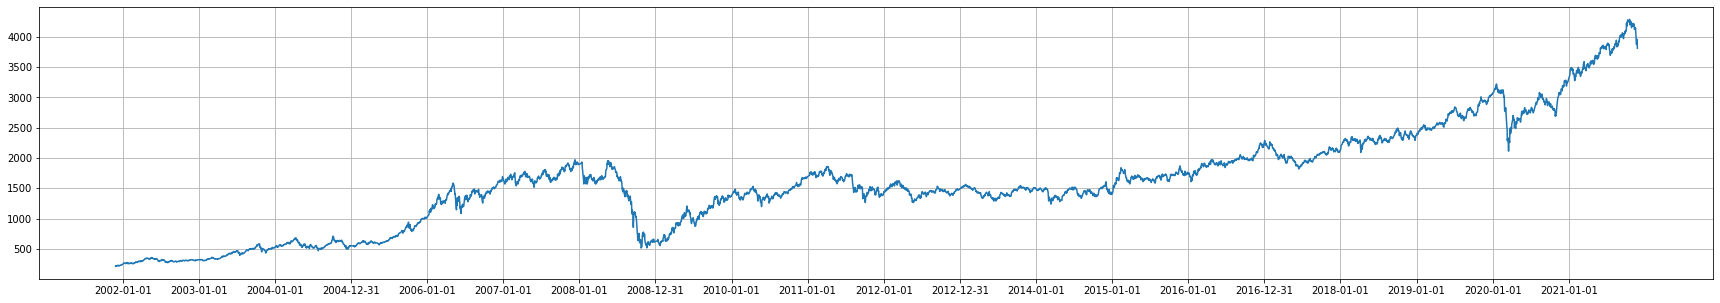

In [199]:
IMOEX = indexes['IMOEX']

plt.figure(figsize=(30, 5))
plt.plot(IMOEX.date, IMOEX.close)
plt.xticks(np.linspace(11688,11688 + 6940,20))
plt.grid(True)
plt.savefig('IMOEX.png')
plt.show()

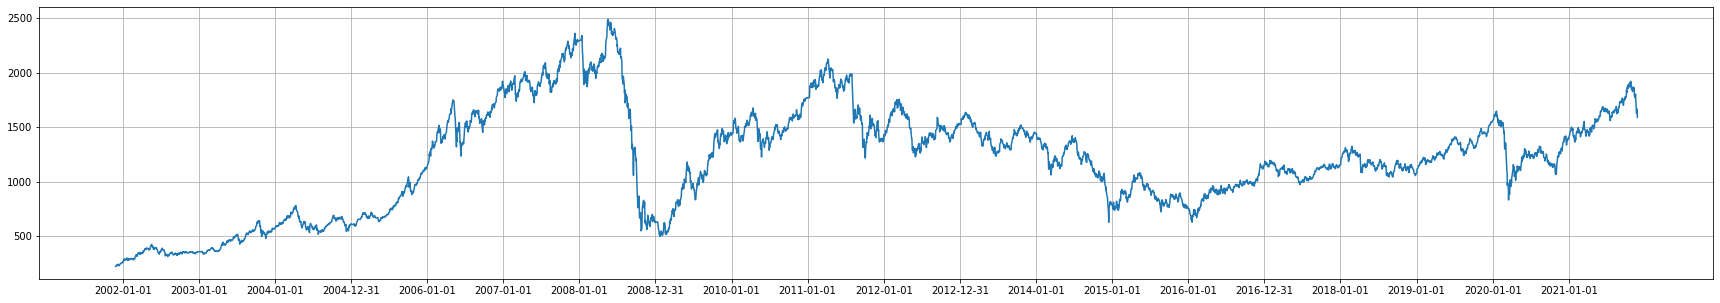

In [204]:
RTSI = indexes['RTSI']

plt.figure(figsize=(30, 5))
plt.plot(RTSI.date, RTSI.close)
plt.xticks(np.linspace(11688,11688 + 6940,20))
plt.grid(True)
plt.savefig('RTSI.png')
plt.show()

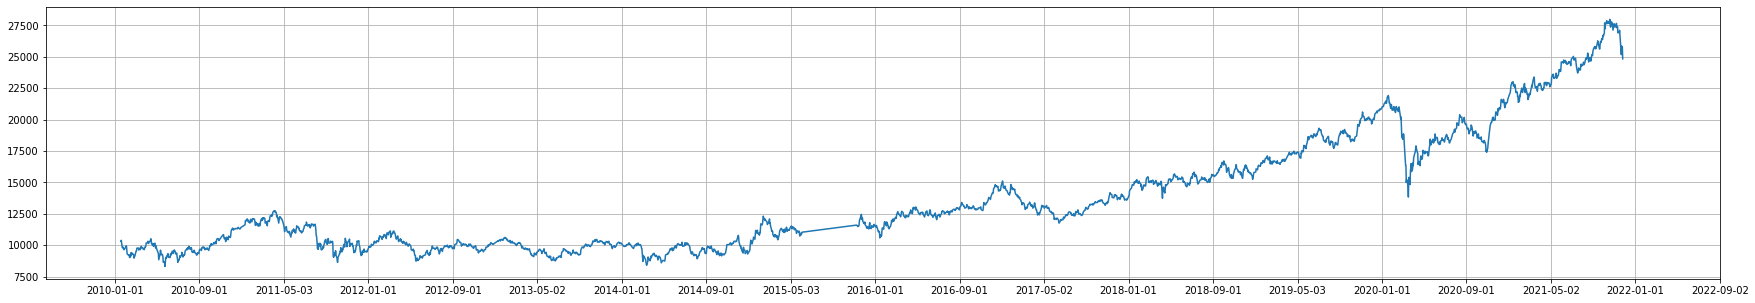

In [250]:
MOEXBC = indexes['MOEXBC']

plt.figure(figsize=(30, 5))
plt.plot(MOEXBC.date, MOEXBC.close)
plt.xticks(np.linspace(14610,19237,20))
plt.grid(True)
plt.savefig('MOEXBC.png')
plt.show()

In [47]:
def make_data(index_dict):
    res = pd.DataFrame(index=pd.date_range(start='11/29/2016', end='11/28/2021'))
    for index_name, index_df in index_dict.items():
        cur = index_df
        cur.index = cur.date
        res[index_name] = cur.close
    res.dropna(inplace=True)
    return res

In [48]:
def show_normed(ticker_list, data):
    plt.figure(figsize=(30, 15))
    for ticker in ticker_list:
        plt.plot(data.index, data[ticker] / data[ticker][0], label=ticker)
    plt.legend(prop={'size': 20})
    plt.grid()
    plt.show()

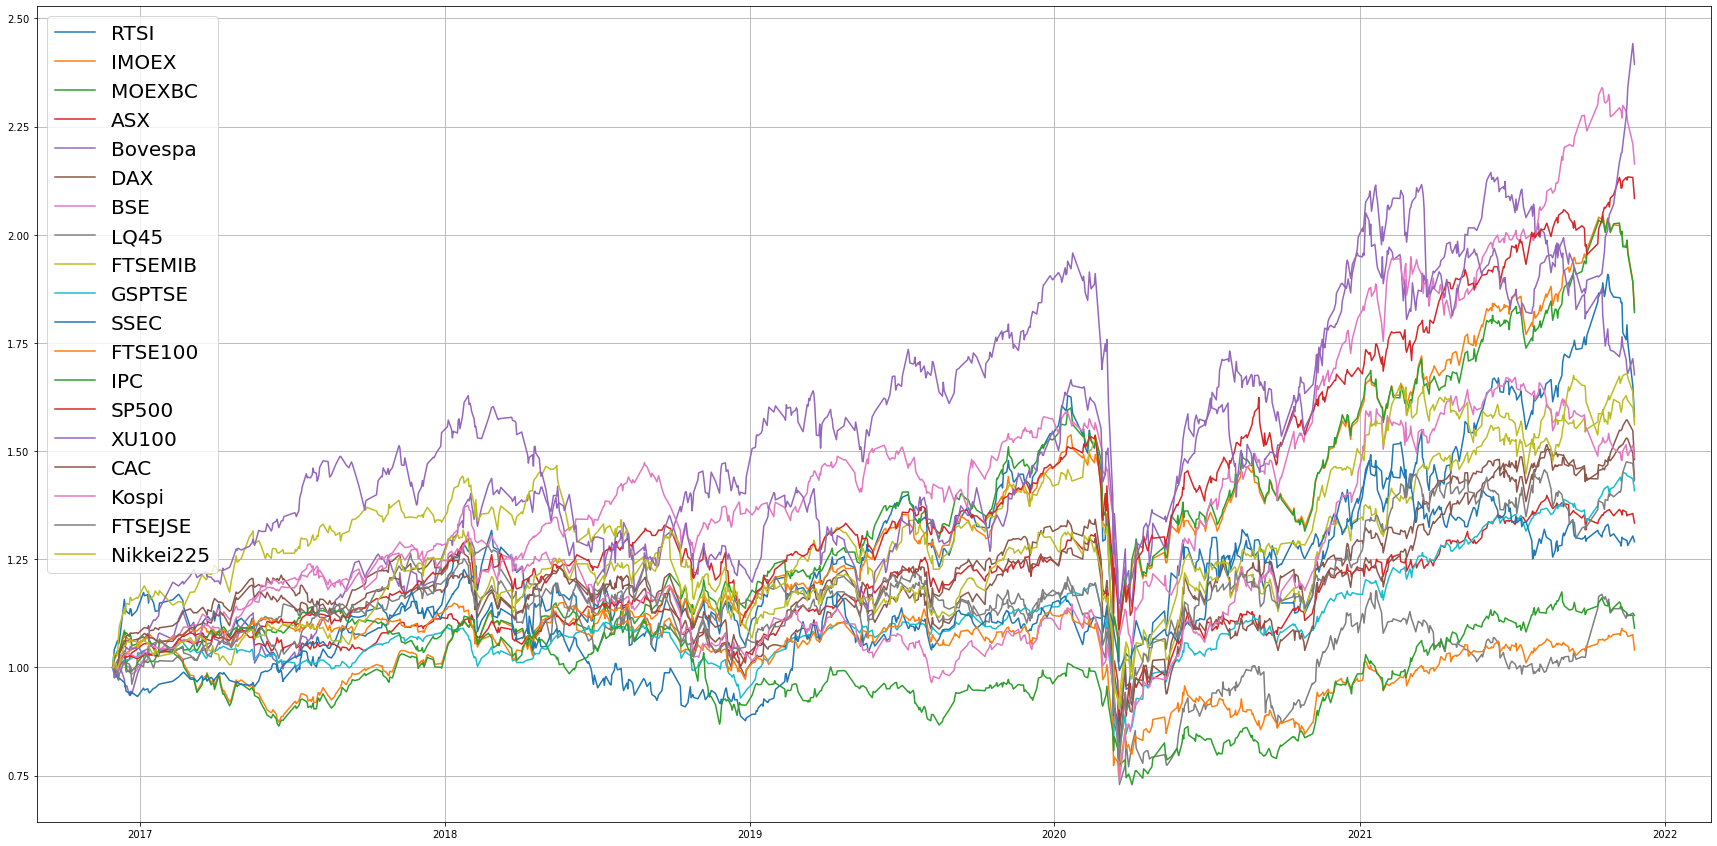

In [66]:
show_normed(
    [
        'RTSI',
        'IMOEX',
        'MOEXBC',
        #'Merval',
        'ASX',
        'Bovespa',
        'DAX',
        'BSE',
        'LQ45',
        'FTSEMIB',
        'GSPTSE',
        'SSEC',
        'FTSE100',
        'IPC',
        'SP500',
        'XU100',
        'CAC',
        'Kospi',
        'FTSEJSE',
        'Nikkei225',
    ],
    make_data(indexes)
)

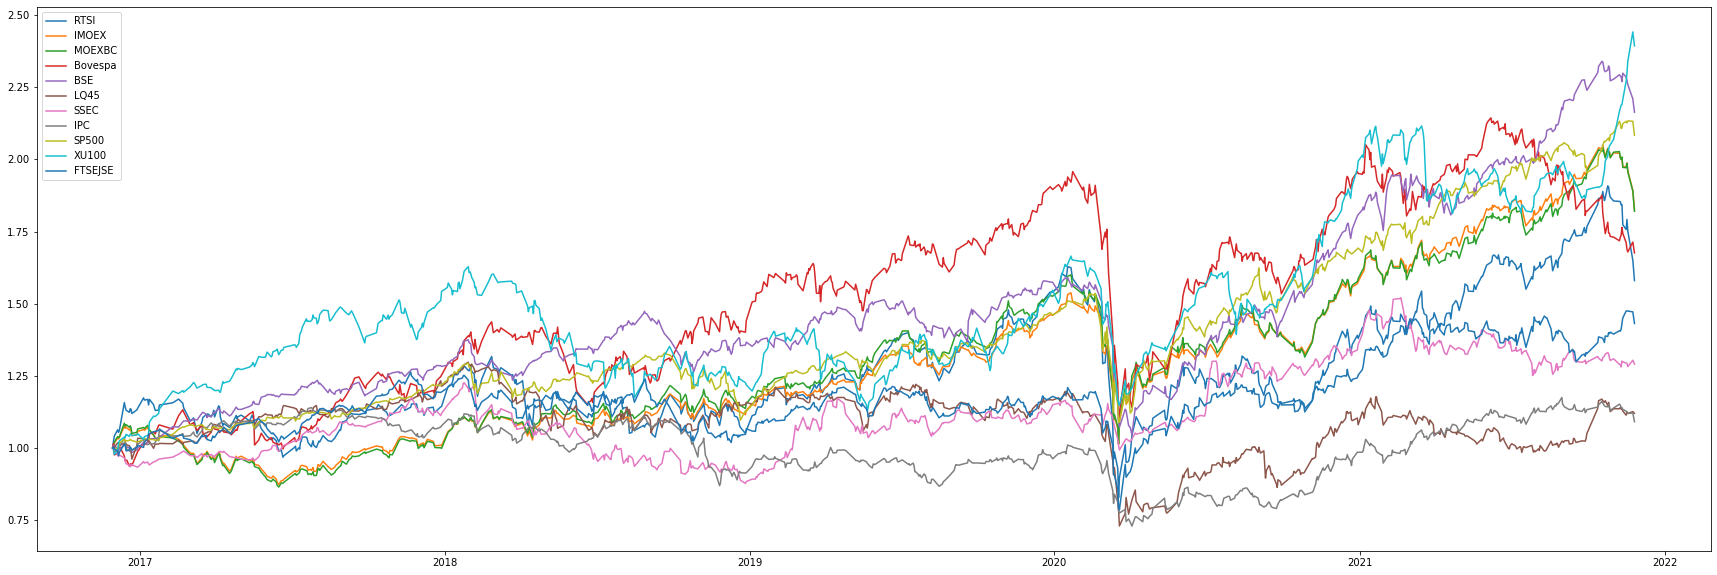

In [34]:
show_normed(
    [
        'RTSI',
        'IMOEX',
        'MOEXBC',
        #'Merval',
        #'ASX',
        'Bovespa',
        #'DAX',
        'BSE',
        'LQ45',
        #'FTSEMIB',
        #'GSPTSE',
        'SSEC',
        #'FTSE100',
        'IPC',
        'SP500',
        'XU100',
        #'CAC',
        #'Kospi',
        'FTSEJSE',
        #'Nikkei225',
    ],
    make_data(indexes)
)

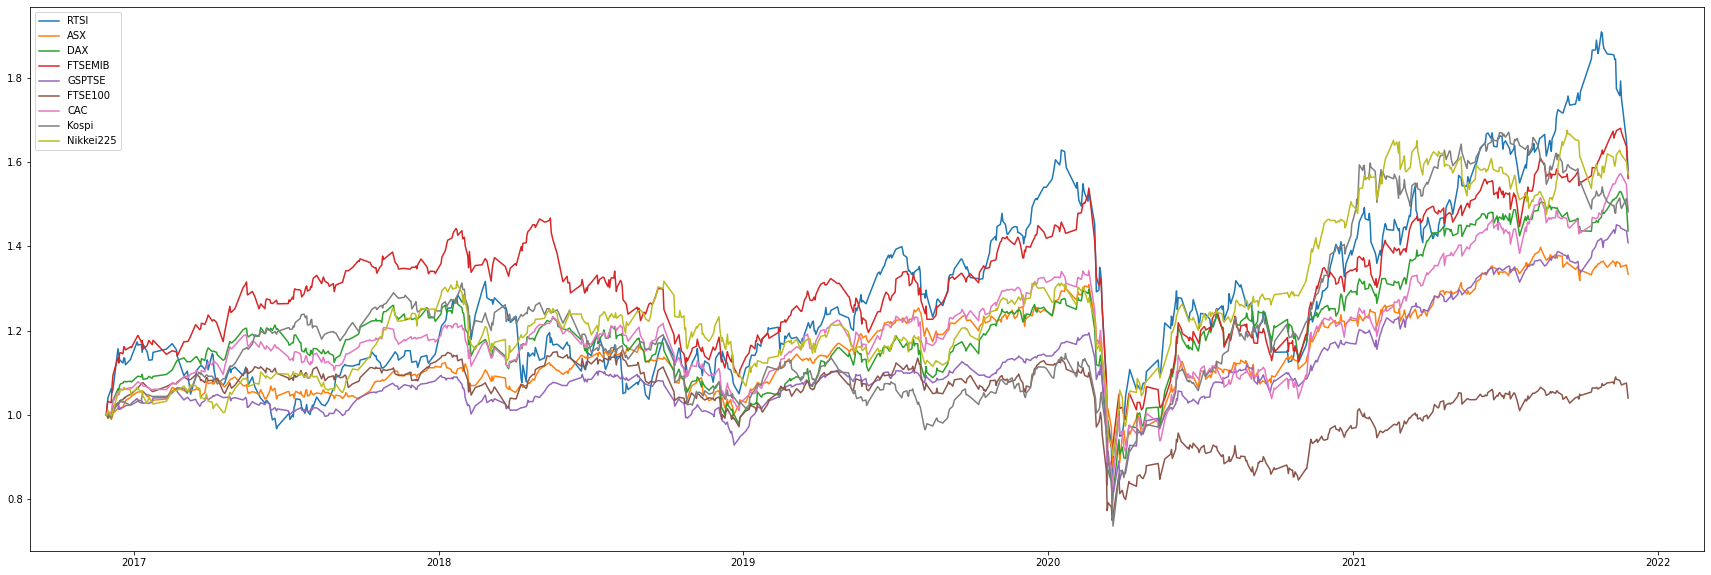

In [33]:
show_normed(
    [
        'RTSI',
        #'IMOEX',
        #'MOEXBC',
        #'Merval',
        'ASX',
        #'Bovespa',
        'DAX',
        #'BSE',
        #'LQ45',
        'FTSEMIB',
        'GSPTSE',
        #'SSEC',
        'FTSE100',
        #'IPC',
        #'SP500',
        #'XU100',
        'CAC',
        'Kospi',
        #'FTSEJSE',
        'Nikkei225',
    ],
    make_data(indexes)
)

In [10]:
def make_normed_stat(ticker_list, data):
    res = pd.DataFrame(index=ticker_list)
    for ticker in ticker_list:
        res.loc[ticker, 'date_now'] = data.index[-1]
        res.loc[ticker, 'Rnow'] = data[ticker].iloc[-1] / data[ticker][0]
        
        res.loc[ticker, 'date_min'] = data[ticker].idxmin()
        res.loc[ticker, 'Rmin'] = (data[ticker] / data[ticker][0]).min()
        
        res.loc[ticker, 'date_max'] = data[ticker].idxmax()
        res.loc[ticker, 'Rmax'] = (data[ticker] / data[ticker][0]).max()
    return res

In [23]:
stat = make_normed_stat(
    [
        'RTSI',
        'IMOEX',
        'MOEXBC',
        'Merval',
        'ASX',
        'Bovespa',
        'DAX',
        'BSE',
        'LQ45',
        'FTSEMIB',
        'GSPTSE',
        'SSEC',
        'FTSE100',
        'IPC',
        'SP500',
        'XU100',
        'CAC',
        'Kospi',
        'FTSEJSE',
        'Nikkei225',
    ],
    make_data(indexes)
)
stat['date_now'] = stat['date_now'].astype(str)
stat['date_min'] = stat['date_min'].astype(str)
stat['date_max'] = stat['date_max'].astype(str)
stat['Rnow'] = stat['Rnow'].round(2)
stat['Rmin'] = stat['Rmin'].round(2)
stat['Rmax'] = stat['Rmax'].round(2)
stat.to_excel('output.xlsx')

In [24]:
stat

,date_now,Rnow,date_min,Rmin,date_max,Rmax
RTSI,2021-11-26,1.58,2020-03-18,0.83,2021-10-25,1.91
IMOEX,2021-11-26,1.83,2017-06-16,0.87,2021-10-19,2.05
MOEXBC,2021-11-26,1.82,2017-06-16,0.86,2021-10-19,2.04
Merval,2021-11-26,4.72,2016-12-19,0.94,2021-11-08,5.64
ASX,2021-11-26,1.33,2020-03-19,0.88,2021-08-13,1.40
Bovespa,2021-11-26,1.68,2016-12-19,0.94,2021-06-07,2.14
DAX,2021-11-26,1.44,2020-03-18,0.79,2021-11-17,1.53
BSE,2021-11-26,2.16,2016-12-22,0.98,2021-10-18,2.34
LQ45,2021-11-26,1.12,2020-03-19,0.73,2018-01-29,1.30
FTSEMIB,2021-11-26,1.56,2020-03-12,0.90,2021-11-17,1.68


In [68]:
E_list = [
        #'Merval',
        #'ASX',
        'Bovespa',
        #'DAX',
        'BSE',
        'LQ45',
        #'FTSEMIB',
        #'GSPTSE',
        'SSEC',
        #'FTSE100',
        'IPC',
        #'SP500',
        'XU100',
        #'CAC',
        #'Kospi',
        'FTSEJSE',
        #'Nikkei225',
]
A_list = [
        #'Merval',
        'ASX',
        #'Bovespa',
        'DAX',
        #'BSE',
        #'LQ45',
        'FTSEMIB',
        'GSPTSE',
        #'SSEC',
        'FTSE100',
        #'IPC',
        'SP500',
        #'XU100',
        'CAC',
        'Kospi',
        #'FTSEJSE',
        'Nikkei225',
]

In [94]:
df = make_data(indexes)
df['E'] = df[E_list].mean(axis=1)
df['A'] = df[A_list].mean(axis=1)
df['AE'] = df[E_list + A_list].mean(axis=1)
full_df = df
df1 = df.loc[(df.index <= pd.Timestamp('29/02/2020')), :]
df2 = df.loc[((pd.Timestamp('01/03/2020') <= df.index ) & (df.index <= pd.Timestamp('30/04/2020'))), :]
df3 = df.loc[(pd.Timestamp('01/05/2020') <= df.index), :]

In [125]:
def make_stat(data, file_name):
    res = data.corr().iloc[:, :3]
    res['RTSI_beta'] = data.cov()['RTSI'] / data.var()
    res['IMOEX_beta'] = data.cov()['IMOEX'] / data.var()
    res['MOEXBC_beta'] = data.cov()['MOEXBC'] / data.var()
    res = res.round(2)
    res.to_excel(f'{file_name}.xlsx')

In [126]:
make_stat(df1, 'period1')
make_stat(df2, 'period2')
make_stat(df3, 'period3')
make_stat(full_df, 'full_time')

In [113]:
a = df.Merval
b = df.RTSI
np.cov(a, b)[0, 1] / np.cov(a, b)[0, 0]

0.011320798662919077